In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

In [3]:
df  = pd.read_csv('education_districtwise.csv')
df = df.dropna()

In [4]:
df

,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI
0,DISTRICT32,STATE1,13,391,104,875564.0,66.92
1,DISTRICT649,STATE1,18,678,144,1015503.0,66.93
2,DISTRICT229,STATE1,8,94,65,1269751.0,71.21
3,DISTRICT259,STATE1,13,523,104,735753.0,57.98
4,DISTRICT486,STATE1,8,359,64,570060.0,65.00
...,...,...,...,...,...,...,...
675,DISTRICT522,STATE29,37,876,137,5296396.0,78.05
676,DISTRICT498,STATE29,64,1458,230,4042191.0,56.06
677,DISTRICT343,STATE29,59,1117,216,3483648.0,65.05
678,DISTRICT130,STATE29,51,993,211,3522644.0,66.16


<Axes: >

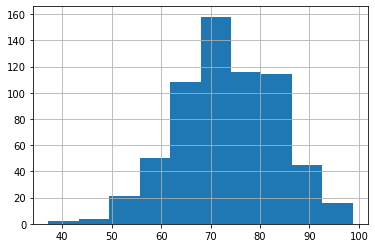

In [6]:
df['OVERALL_LI'].hist()

In [7]:
mean_overall_li = df['OVERALL_LI'].mean()
mean_overall_li

73.39518927444796

In [8]:
std_overall_li = df['OVERALL_LI'].std()
std_overall_li

10.098460413782467

In [9]:
lower_limit = mean_overall_li - 1 * std_overall_li
upper_limit = mean_overall_li + 1 * std_overall_li
((df['OVERALL_LI'] >= lower_limit) & (df['OVERALL_LI'] <= upper_limit)).mean()

0.6640378548895899

In [10]:
lower_limit = mean_overall_li - 2 * std_overall_li
upper_limit = mean_overall_li + 2 * std_overall_li
((df['OVERALL_LI'] >= lower_limit) & (df['OVERALL_LI'] <= upper_limit)).mean()

0.9542586750788643

In [11]:
lower_limit = mean_overall_li - 3 * std_overall_li
upper_limit = mean_overall_li + 3 * std_overall_li
((df['OVERALL_LI'] >= lower_limit) & (df['OVERALL_LI'] <= upper_limit)).mean()

0.9968454258675079

In [12]:
df['Z_SCORE'] = stats.zscore(df['OVERALL_LI'])
df

,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI,Z_SCORE
0,DISTRICT32,STATE1,13,391,104,875564.0,66.92,-0.641712
1,DISTRICT649,STATE1,18,678,144,1015503.0,66.93,-0.640721
2,DISTRICT229,STATE1,8,94,65,1269751.0,71.21,-0.216559
3,DISTRICT259,STATE1,13,523,104,735753.0,57.98,-1.527694
4,DISTRICT486,STATE1,8,359,64,570060.0,65.00,-0.831990
...,...,...,...,...,...,...,...,...
675,DISTRICT522,STATE29,37,876,137,5296396.0,78.05,0.461307
676,DISTRICT498,STATE29,64,1458,230,4042191.0,56.06,-1.717972
677,DISTRICT343,STATE29,59,1117,216,3483648.0,65.05,-0.827035
678,DISTRICT130,STATE29,51,993,211,3522644.0,66.16,-0.717030


In [15]:
df[(df['Z_SCORE'] > 3) | (df['Z_SCORE'] < -3)]

,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI,Z_SCORE
434,DISTRICT461,STATE31,4,360,53,532791.0,42.67,-3.044964
494,DISTRICT429,STATE22,6,612,62,728677.0,37.22,-3.585076


**Thanks to this code, we found out whether our date set is equal to the Empirical Rules, that is, 1 standard deviation is 68, 2 - 95 and 3 -99.7 we have 66,95,99.6, that is, we can say that the rule is being applied.We also found two lines that are outliers**